<a href="https://colab.research.google.com/github/jasmineA20/MathModeling/blob/main/TakeHomePart_Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 a) $\Delta a_n  = 0.01a_n - P $ \\
           $a_{n+1} = 1.01a_n - P$ \\
           so, 
           $a_n = (1.01)^n (100,000 - \frac{P}{1-1.01}) +\frac{P}{1-1.01}$ \\
           The maximum value of P that can be used so that their annuity lasts for 10 years is obtained by solving for the above DDS for n = 10*12 = 120 \
            by putting $a_{120}$ = 0 

In [2]:
from sympy.solvers import solve
from sympy import Symbol

In [16]:
P = Symbol('P')
solve((1.01**120)*(100000 - (P/0.01)) + (P/0.01),P)

[1434.70948402587]

Therefore, the maximum value of p they can use so that their annuity lasts for another 10 years is $1434

3 b) In this case, we have $a_{120}$ = 0 still but since we now know the amount to be withdrawn every month but not the starting amount, the initial amount, $a_0 = x$ (let) and we have our equation \
$a_n = (1.01)^n (x - \frac{3000}{1-1.01}) +\frac{3000}{1-1.01}$ \ 
We can get the gift amount by solving the above equation for x with n = 120 

In [17]:
x = Symbol('x')
solve((1.01**120)*(x - (3000/0.01)) + (3000/0.01),x)

[209101.566094192]

For the equilibrium value, we take \\
$a_{n+1} = 1.01 a_n - 3000$  and set $a_{n+1} = a_n = c$ and solve for c \\

In [20]:
c = Symbol('c')
solve(0.01*c-3000,c)

[300000.000000000]

The equilibrium amount \$300000 indicates the amount of money required in the annuity in the beginning to withdraw $3000 a month indefinitely. 

In [26]:
c   = 300000
c1  = 299999
c2  = 300001
x   = 1.01*c - 3000
x1  = 1.01*c1 - 3000
x2  = 1.01*c2 - 3000
print (x,x1,x2)

300000.0 299998.99 300001.01


Since $a_{n+1}$ approaches \$300000 from both $a_n$ higher than and lower than the equilibrium value, we conclude that c is a stable equilibrium.  

4 The feasible region is the area bounded by the coordinates plotted in the graph. 

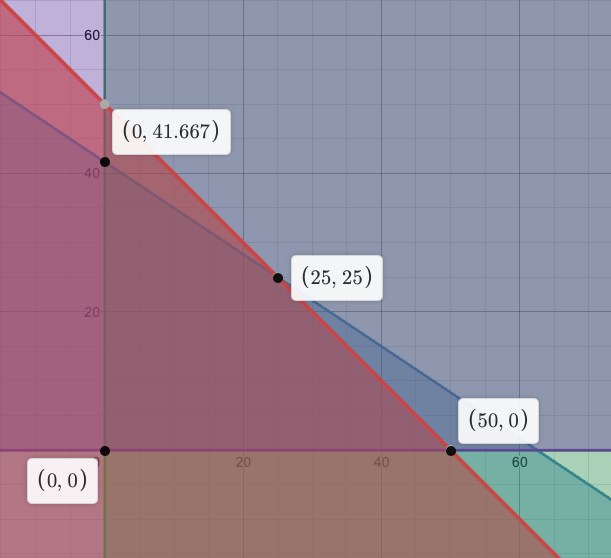

C -> number of cars and T-> number of trucks restored. 
We have our objective function max 300C + 200T (Profit)\
and constraints 
5C + 5T $\leq$ 250 (machine shop),  4C + 6T $\leq$ 240 (refinishing shop)  
and C, T $\leq$ 0 \\
Here, to solve this problem, since we know that the solution is one of the corners, we start at one corner, say (0,0) and look at whether one of the neighbors is better or not. We see that the neighbor (50,0) is a better solution with objective function value of 15000. Following the same algorithm, we find that the other point is not a better solution since the value of the objective function is 12500 at that point so we stay at (50,0) and that is our solution.


5

In [28]:
import numpy as np

a) Chebyshev Approximation: The decision variables are r (largest absolute deviation), a and c. We min r such that \\
r - ($y_i - cx_i^\alpha) \geq 0 $ \\
r + ($y_i + cx_i^\alpha) \geq 0 $

We are looking for a model which minimizes the deviation between the data and the line $ y = cx^\alpha$ and solving for estimates of c and $\alpha$. 

In [60]:
from scipy.optimize import linprog 
import matplotlib.pyplot as plt 
import pandas as pd

In [61]:
ones = np.ones([7,1])
c = np.array([[1, 0, 0]])

In [62]:
x1 = np.array([[20,30,45,150,280,550,900]])
y1 = np.array([[45,70,140,900,2000,6000,12000]])

In [63]:
x = np.log(x1)
y = np.log(y1)

In [64]:
A = np.concatenate([np.concatenate([ones, np.transpose(x), ones], axis=1),np.concatenate([ones, -1*np.transpose(x),-1*ones], axis=1)])
b = np.concatenate([np.transpose(y), -1*np.transpose(y)])
residue = linprog(c,A_ub= -1*A ,b_ub = -1* b, bounds =[(None, None),(None, None),(None, None)])
print('A = ',A)
print('b = ',b)
print(residue)

A =  [[ 1.          2.99573227  1.        ]
 [ 1.          3.40119738  1.        ]
 [ 1.          3.80666249  1.        ]
 [ 1.          5.01063529  1.        ]
 [ 1.          5.6347896   1.        ]
 [ 1.          6.30991828  1.        ]
 [ 1.          6.80239476  1.        ]
 [ 1.         -2.99573227 -1.        ]
 [ 1.         -3.40119738 -1.        ]
 [ 1.         -3.80666249 -1.        ]
 [ 1.         -5.01063529 -1.        ]
 [ 1.         -5.6347896  -1.        ]
 [ 1.         -6.30991828 -1.        ]
 [ 1.         -6.80239476 -1.        ]]
b =  [[ 3.80666249]
 [ 4.24849524]
 [ 4.94164242]
 [ 6.80239476]
 [ 7.60090246]
 [ 8.69951475]
 [ 9.39266193]
 [-3.80666249]
 [-4.24849524]
 [-4.94164242]
 [-6.80239476]
 [-7.60090246]
 [-8.69951475]
 [-9.39266193]]
     con: array([], dtype=float64)
     fun: 0.08050381574461563
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([-1.04227738e-12,  1.61007631e-01,  7.07008347e-02,  3.24185123e-13,
        1.29477020e-

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


The above result shows the matrix form of the set of equations to minimize the residue discussed earlier. 

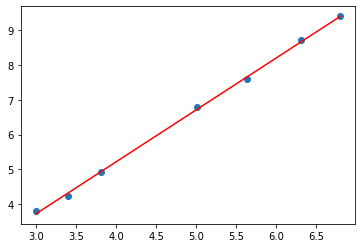

In [65]:
plt.scatter(x,y)
plt.plot(x[0], 1.48678733*x[0] -0.7278581,'r')

In [67]:
c = np.exp(-0.7278581)
print(c)

0.48294229718126086


Therefore, using CAC, c = 0.4829.. and alpha= 1.48678733

b) Least Squares Approximation \\
we formulate the model by transforming $y = cx^\alpha$ to ln(y) = ln(c) + $\alpha ln(x)$ \\
we want to solve for variables ln(C) - intercept and slope a such that 
$\sum_{1}^{m} (ln y_i - (ln(\alpha)+ a ln(x)))$ is minimized. This is done by formulating normal equations Q = $\sum(y_i - f(x))^2$ \\
$\frac{dQ}{db_0} = 0$ and $\frac{dQ}{db_1}=0$ where $x_0 = ln c $ and $ x_1 = a$ 

In [39]:
x = np.array([20,30,45,150,280,550,900])
y = np.array([45,70,140,900,2000,6000,12000])

In [42]:
lny = np.log(y)
lnx = np.log(x)

now we can compare this to y = ax + b where b =ln(c) and a = $\alpha$. Using the normal equations for b and a from least squares criterion, 

In [43]:
m = len(x)

In [45]:
alpha = (m*sum(np.multiply(lnx,lny))-sum(lnx)*sum(lny))/(m*sum(lnx**2)-(sum(lnx)**2))
lnc   = (sum(lnx**2)*sum(lny) - sum(np.multiply(lnx,lny)*sum(lnx))) / (m*sum(lnx**2) - sum(lnx)**2)

In [46]:
c = np.exp(lnc)
print("c = ", c)
print("alpha = ", alpha)

c =  0.4873685070642817
alpha =  1.4876748704420732


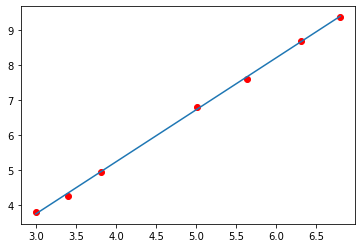

In [51]:
plt.scatter(lnx,lny,c='r')
plt.plot(lnx, alpha*lnx + lnc )

d) Both the models fit the data well and give similar values for both the intercept and the slope. 

e)

In [68]:
x = np.array([20,30,45,150,280,550,900])
y = np.array([45,70,140,900,2000,6000,12000])

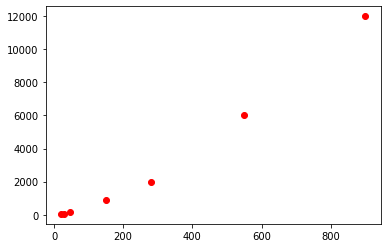

In [69]:
plt.scatter(x,y,c='r')

y = ax would not be a good fit for the data since it is not linear. 
for $ y = e^{bx}$, we can look at the plot of lny = bx 

In [70]:
y1 = np.log(y) 

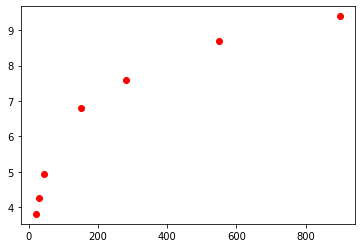

In [71]:
plt.scatter(x,y1,c='r')

The plot above is not linear so we know that lny and x do not have a linear relationship so cannot be fit with the tranformed model lny = bx as well as the original model $y = e^{bx}$ 